<a href="https://colab.research.google.com/github/GergelyTuri/context-project/blob/main/Colocalization_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing RNAsocpe colocalization
* 12/1/2023
* troubleshooting and making it interactive --GT
* 3/6/24 making this as a plotting notebook and creating a separate interactive one.

In [ ]:
!git clone https://github.com/GergelyTuri/context-project.git

In [ ]:
%cd context-project/
!pip install .

In [ ]:
# %cd context-project/
# !git pull

In [1]:
import src.coloc_helpers as helpers
from os.path import join, dirname
import pandas as pd

### mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Importing the sets which are available for analysis

In [3]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('coloc_datasets').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
coloc_data = pd.DataFrame.from_records(rows[1:], columns=rows[0])
coloc_data

,xml,image
0,/content/drive/Shareddrives/Turi_lab/Data/psil...,
1,/content/drive/Shareddrives/Turi_lab/Data/psil...,
2,/content/drive/Shareddrives/Turi_lab/Data/psil...,
3,/content/drive/Shareddrives/Turi_lab/Data/psil...,CounterWindowComposite_series4.png
4,/content/drive/Shareddrives/Turi_lab/Data/psil...,CounterWindowComposite_series13.png
5,/content/drive/Shareddrives/Turi_lab/Data/psil...,CounterWindowComposite_series14.png
6,/content/drive/Shareddrives/Turi_lab/Data/psil...,CounterWindowComposite_series15.png
7,/content/drive/Shareddrives/Turi_lab/Data/psil...,CounterWindowComposite_series16.png
8,/content/drive/Shareddrives/Turi_lab/Data/psil...,CounterWindowComposite_series11.png
9,/content/drive/Shareddrives/Turi_lab/Data/psil...,CounterWindowComposite_series14.png


### Selecting a row we want to work with:

In [4]:
set_to_analyze = coloc_data.iloc[3]

### Parsing the XML data, calculating the pairwise distance and plotting the results

Note: the black cicrcles in the plot denotes the double labeled cells based on the calculation and distance thresholding. `plot_distances` takes a `distance` argument which is set to `15.0` by default. it may worth trying to change that.


<Axes: xlabel='Type1_MarkerX', ylabel='Type1_MarkerY'>

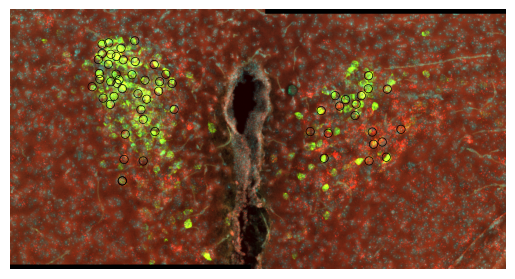

In [5]:
data = helpers.parse_xml(set_to_analyze[0])
pairwise_dist = helpers.calc_pairwise_dist(data)
image_path = join(dirname(set_to_analyze[0]), set_to_analyze[1])
helpers.plot_distances(pairwise_dist, image_path=image_path)